[*********************100%***********************]  1 of 1 completed


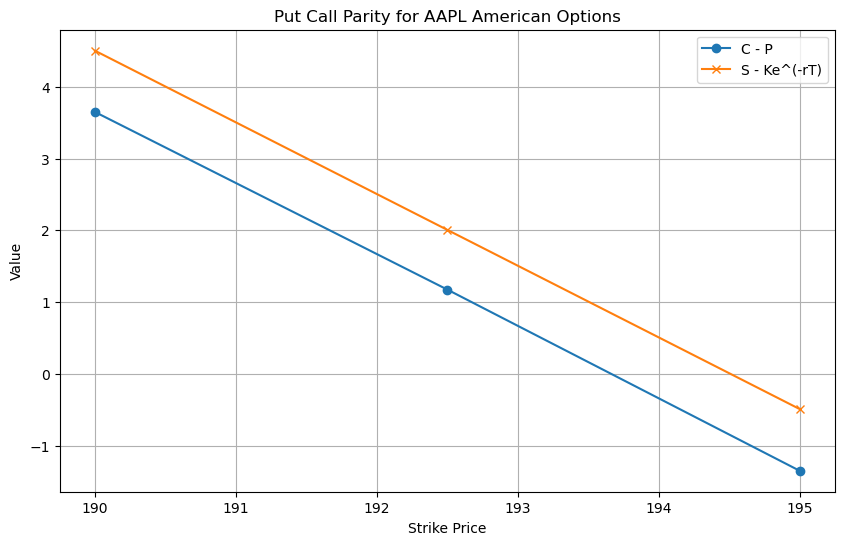

In [21]:
#import libraries

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

#=====================================


#downloading stock data for apple 


aapl = yf.download('AAPL', start='2024-01-02', end='2025-04-17')


#taking spot price

spot = aapl['Close'].loc['2025-04-16']  
spot


#=====================================


#taking data from bloomberg w/ midpoint

data = {
    
    'Strike': [190, 192.5, 195],
    'Call': [7.80, 6.25, 4.85],
    'Put':  [4.15, 5.075, 6.20],
    'Expiry': ['2025-04-25'] * 3
    
    
}

df = pd.DataFrame(data)


#=====================================


#assuming rfr of 5%

r = 0.05


#calcualting time to maturity in yrs 
#valuation date - apr 16th 2025 


valdate = datetime(2025, 4, 16)

df['T'] = [(datetime.strptime(exp, '%Y-%m-%d') - valdate).days / 365 for exp in df['Expiry']]

#=====================================


#adding spot price col

df['S'] = [spot] * len(df)



#calculating call - put 

df['L'] = df['Call'] - df['Put']



#calcualting  S - K * e^(-r*(T-t))


df['R'] = df['S'] - df['Strike'] * np.exp(-r * df['T'])


#=====================================


plt.figure(figsize=(10,6))

plt.plot(df['Strike'], df['L'], label='C - P', marker='o')
plt.plot(df['Strike'], df['R'], label='S - Ke^(-rT)', marker='x')

plt.title('Put Call Parity for AAPL American Options')

plt.xlabel('Strike Price')
plt.ylabel('Value')

plt.legend()
plt.grid(True)
plt.show()



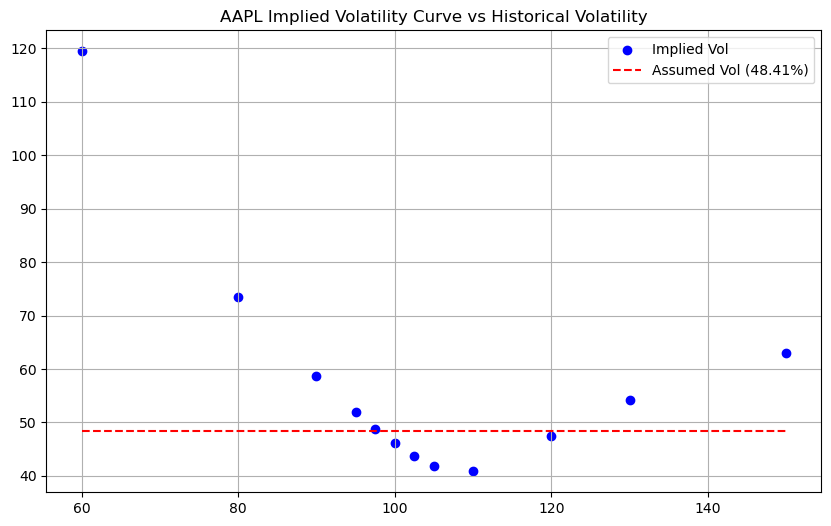

In [29]:
#implied volatility vs historical volatility plot 

#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#bloomberg implied vols for aapl options expiring April 25, 2025

allm = [60.0, 80.0, 90.0, 95.0, 97.5, 100.0, 102.5, 105.0, 110.0, 120.0, 130.0, 150.0]
iv = [119.46, 73.51, 58.77, 51.97, 48.85, 46.13, 43.78, 41.78, 40.86, 47.54, 54.26, 62.91]
fvol = [48.41] * len(allm)


#implited volatilities vs. points vs flat 48.41% volatility
#scatter plot

plt.figure(figsize=(10,6))

plt.scatter(allm, iv, color='blue', label='Implied Vol')


#adding line for flat vol

plt.plot(allm, fvol, linestyle='--', color='red', label='Assumed Vol (48.41%)')

plt.title('AAPL Implied Volatility Curve vs Historical Volatility')
plt.xlabel('')
plt.ylabel('')

plt.grid(True)
plt.legend()
plt.show()



